In [130]:
import create_r3d_functions as c3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])



Creating amr_grid with octree refinement.
Length of total side of whole grid: 7.24 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [4, 3, 2, 1] AU
Number refinements: 4
Size of base cell: 0.362 AU
Child cell size 1: 0.181 AU
Child cell size 2: 0.0905 AU
Child cell size 3: 0.04525 AU
Child cell size 4: 0.022625 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [2]:
from bhmie.makedustopac import *

compute_opac_mie()



In [2]:
import analyze_r3d_functions as a3d
import numpy as np

wavelengths,nwave = a3d.load_wavelengthgrid()

print(
    np.array([
        wavelength*1e-4 for wavelength in wavelengths
    ])
)

[1.00000000e-05 1.10520985e-05 1.22148882e-05 1.35000147e-05
 1.49203493e-05 1.64901170e-05 1.82250398e-05 2.01424935e-05
 2.22616822e-05 2.46038305e-05 2.71923959e-05 3.00533038e-05
 3.32152074e-05 3.67097745e-05 4.05720044e-05 4.48405790e-05
 4.95582496e-05 5.47722657e-05 6.05348477e-05 6.69037100e-05
 7.39426394e-05 8.17221335e-05 9.03201070e-05 9.98226721e-05
 1.10325001e-04 1.21932277e-04 1.34760754e-04 1.48938913e-04
 1.64608754e-04 1.81927217e-04 2.01067752e-04 2.22222061e-04
 2.45602011e-04 2.71441762e-04 3.00000109e-04 3.31563076e-04
 3.66446778e-04 4.05000589e-04 4.47610641e-04 4.94703690e-04
 5.46751392e-04 6.04275025e-04 6.67850710e-04 7.38115184e-04
 8.15772173e-04 9.01599442e-04 9.96456586e-04 1.10129364e-03
 1.21716057e-03 1.34521786e-03 1.48674803e-03 1.64316857e-03
 1.81604609e-03 2.00711203e-03 2.21827999e-03 2.45166490e-03
 2.70960420e-03 2.99468125e-03 3.30975122e-03 3.65796965e-03
 4.04282410e-03 4.46816902e-03 4.93826442e-03 5.45781849e-03
 6.03203476e-03 6.666664

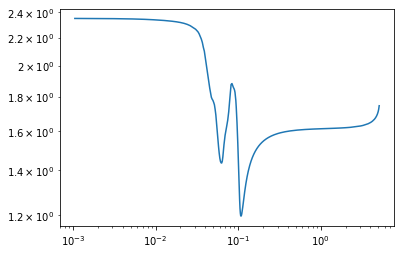

In [2]:
import numpy as np
import matplotlib.pyplot as plt

mg2sio4 = np.loadtxt('../bhmie/lnk/mg2sio4.lnk',delimiter=' ')

plt.plot(1/mg2sio4[:,0],mg2sio4[:,1])
plt.xscale('log')
plt.yscale('log')





In [1]:
import opacity_r3d_functions as o3d


o3d.create_kappaabs(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,0.13,0.17,0.22,0.28,0.36,0.46,0.60,0.77,1.00]
)

För proof of concept-koden:

Använd dessa agrainum:

Avrunda till 2 decimaler

agrain      range

0.10   0.074 - 0.135

0.13   0.096 - 0.175

0.17   0.129 - 0.229

0.22   0.163 - 0.297

0.28   0.207 - 0.378

0.36   0.267 - 0.486

0.46   0.341 - 0.621

0.60   0.444 - 0.810

0.77   0.570 - 1.039

1.00   0.741 - 1.350

In [1]:
import analyze_r3d_functions as a3d
import create_r3d_functions as c3d


c3d.create_spheredensity(
    optconstlist=['al2o3porous','mg2sio4'],
    agrainlist=[0.10,1.00]    
)


Writing dust_density.inp
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.34480268109295337 0.1 0
0.3696845502136472 0.1 0
0.4041451884327381 0.1 0
0.3696845502136472 0.1 0
0.33166247903553997 0.1 0
0.30368111930480995 0.1 0
0.2886751345948129 0.1 0
0.2886751345948129 0.1 0
0.30368111930480995 0.1 0
0.33166247903553997 0.1 0
0.3696845502136472 0.1 0
0.34480268109295337 0.1 0
0.30368111930480995 0.1 0
0.2728450923957484 0.1 0
0.2560381915956203 0.1 0
0.2560381915956203 0.1 0
0.2728450923957484 0.1 0
0.30368111930480995 0.1 0
0.34480268109295337 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886751345948129 0.1 0
0.33166247903553997 0.1 0
0.33166247903553997 0.1 0
0.2886751345948129 0.1 0
0.2560381915956203 0.1 0
0.23804761428476173 0.1 0
0.23804761428476173 0.1 0
0.2560381915956203 0.1 0
0.2886

# co5bold data - anteckningar

- i teststjärnan,


    ['Z'][0][0]

    [7], 10 tid i sekunder

    [13] - time step number

    [16], [19], [22] - cellcentrumkoordinater i cm

    [25],28,31     - cellboundary coords i cm

     34 - densitet i g/cm3! 317**3 antal celler!

     37 - internal energy erg/g - gör om till temperaturer? E=nkT? Knappast ideellt men en början

- teststar['EOS'][0][0][0] - är 317**3 (innehåller 2 arrayer-arrayer)

    Nästa steg [0] har 317**2

    Nästa har 317. Så det är nåt värde per cell

    Alla är i stolreken 1e-4

> Kolla manualen efter EOS
    
- teststar['OPA']... - opaciteter, kappa skrivs i infon - vll jag ha - hitta unique här och se om du kan minska ner till ett tiotal kappa

- ['PAR'] - har info om själva beräkningstid etc, inställningar



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')
teststar = teststar['ful']

# Dict-columns
print(teststar.dtype.names)

#print(teststar['ful']['PAR'][0])
# Info on model run, stellar initial properties

#print(teststar['Z'])

# Probably grid sizes
#print(teststar['Z'][0][0][4])

# Total time(?)
#print(f"{teststar['Z'][0][0][7]} {teststar['Z'][0][0][8]}")

# Coordinates of one grid direction
#print(teststar['Z'][0][0][16][0][0]) #  -5.4185920e+13 - 5.4185844e+13  b'cm', b'x1 coordinates of cell

# XYZ-cell center coordinates in centimeters
print(np.size(teststar['Z'][0][0][16]))
print(np.size(teststar['Z'][0][0][19]))
print(np.size(teststar['Z'][0][0][22]))
print(np.size(teststar['Z'][0][0][25]))


ngrid = np.size(teststar['Z'][0][0][16])

gridx = []
gridy = []
gridz = []

for nn in range(ngrid):
    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)

gridcournx = []
gridcourny = []
gridcournz = []

for nn in range(ngrid+1):
    gridcournx.append(teststar['Z'][0][0][25][0][0][nn]/AUcm)
    gridcourny.append(teststar['Z'][0][0][28][0][nn][0]/AUcm)
    gridcournz.append(teststar['Z'][0][0][31][nn][0][0]/AUcm)


('TYPE', 'HEAD', 'DATASET_ID', 'DATASET_ID__UNIT', 'DATASET_ID__NAME', 'MODELTIME', 'MODELTIME__UNIT', 'MODELTIME__NAME', 'MODELTIME_DB', 'MODELTIME_DB__UNIT', 'MODELTIME_DB__NAME', 'MODELITIME', 'MODELITIME__UNIT', 'MODELITIME__NAME', 'DTIME', 'DTIME__UNIT', 'DTIME__NAME', 'TIME_OUT_FULL_LAST', 'TIME_OUT_FULL_LAST__UNIT', 'TIME_OUT_FULL_LAST__NAME', 'TIME_OUT_MEAN_LAST', 'TIME_OUT_MEAN_LAST__UNIT', 'TIME_OUT_MEAN_LAST__NAME', 'Z', 'EOS', 'OPA', 'PAR')
317
317
317
318


In [3]:
teststar['Z'][0][0][22][2][0][0]/AUcm

-3.5762521459506145

Max difference between cell sizes: 5.607433254464778e-07
Mean cellsize: 0.022924646491984432


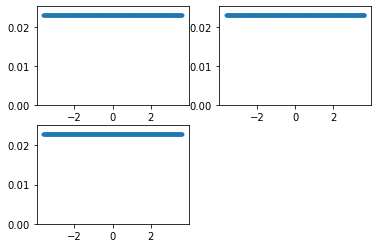

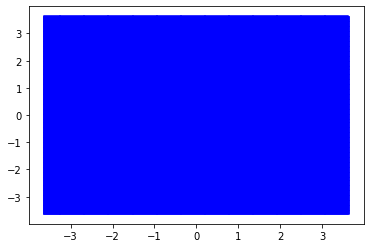

In [84]:

ngrid = np.size(gridx)

# Cell sizes
#teststar['Z'][0][0][25]))
#teststar['Z'][0][0][28]))
#teststar['Z'][0][0][31]))

#import create_r3d_functions as a3d


#> översätta grids: Jag har R,x,y,z-koordinater för alla celler för mina grids.
#    från co5bold har jag hörnen och avstånd från mitten av vardera axel
#    0. gör ett grid som har motsvarande upplösning och storlek som co5bold
#    1. gör en likadan lista med R,x,y,z-koordinater för alla celler
#    2. leta upp vilka co5boldceller motsvarar mina celler
#    3. spara rätt densiteter, temperaturer, absorptioner i min lista


nx,ny,nz = 0,0,0
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(ngrid):

    cellsizesx.append(
        (teststar['Z'][0][0][25][0][0][nn+1] - teststar['Z'][0][0][25][0][0][nn])/AUcm
    )
    cellsizesy.append(
        (teststar['Z'][0][0][28][0][nn+1] - teststar['Z'][0][0][28][0][nn])[0]/AUcm
    )
    cellsizesz.append(
        (teststar['Z'][0][0][31][nn+1] - teststar['Z'][0][0][31][nn])[0][0]/AUcm
    )


plt.figure('gridsize')
plt.subplot(2,2,1)
plt.plot(gridx,cellsizesx,'.')
plt.ylim(0,np.max(cellsizesx)*(1.1))

plt.subplot(2,2,2)
plt.plot(gridy,cellsizesy,'.')
plt.ylim(0,np.max(cellsizesy)*(1.1))

plt.subplot(2,2,3)
plt.plot(gridz,cellsizesz,'.')
plt.ylim(0,np.max(cellsizesz)*(1.1))


print(f'Max difference between cell sizes: {np.max(np.diff(cellsizesx))}')
print(f'Mean cellsize: {np.mean(cellsizesx)}')

plt.figure('grid')
for nn in range(ngrid):
    plt.plot([gridcournx[nn],gridcournx[nn]],[gridcourny[0],gridcourny[-1]],'b')
    plt.plot([gridcournx[0],gridcournx[-1]],[gridcourny[nn],gridcourny[nn]],'b')



#print(np.size(teststar['EOS'][0][0][0][0][0]))


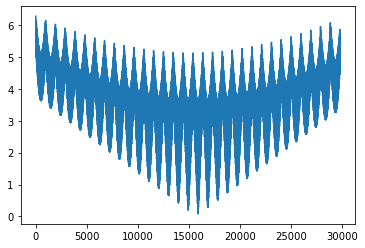

In [20]:
import matplotlib.pyplot as plt

AUcm = 1.49598e13 # cm

radialgrid = []

for nx in range(int(ngrid/10)):
    for ny in range(int(ngrid/10)):
        for nz in range(int(ngrid/10)):
            radialgrid.append(np.sqrt(gridx[10*nx]**2 + gridy[10*ny]**2 + gridz[10*nz]**2)/AUcm)


plt.plot(radialgrid)

"""    
plt.figure('x-y')
plt.plot(gridx[nn]/AUcm,gridy[nn]/AUcm,'b.')
plt.figure('x-z')
plt.plot(gridx[nn]/AUcm,gridz[nn]/AUcm,'r.')
""";



In [7]:
# Use this for grid-extracting functions!

#  Densities: teststar['Z'][0][0][34][nx][ny][nz]

# Grid:
#    gridx.append(teststar['Z'][0][0][16][0][0][nn]/AUcm)
#    gridy.append(teststar['Z'][0][0][19][0][nn][0]/AUcm)
#    gridz.append(teststar['Z'][0][0][22][nn][0][0]/AUcm)

import create_r3d_functions as c3d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load sav-file
teststar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')

# Extract data
teststar = teststar['ful']

# Get number of gridcells from co5bold data
nc5dedge = np.size(teststar['Z'][0][0][16])
nc5d = nc5dedge**3

cobolddensities = np.zeros(nc5d)
cobolddistances = np.zeros((nc5d,4))
nx,ny,nz = 0,0,0

for nn in range(nc5d):
    # Save densities
    cobolddensities[nn] = teststar['Z'][0][0][34][nx][ny][nz]

    # Save x,y,z distances in cm
    cobolddistances[nn,1] = teststar['Z'][0][0][16][0][0][nx]
    cobolddistances[nn,2] = teststar['Z'][0][0][19][0][ny][0]
    cobolddistances[nn,3] = teststar['Z'][0][0][22][nz][0][0]
    
    # Save radial distances in cm
    cobolddistances[nn,0] = np.sqrt(
        cobolddistances[nn,1]**2 + cobolddistances[nn,2]**2 + cobolddistances[nn,3]**2
    )

    # Save cellsizes < do I need this?

    # Move coordinates
    nx,ny,nz = c3d.movecoordinates(nc5dedge,nx,ny,nz)



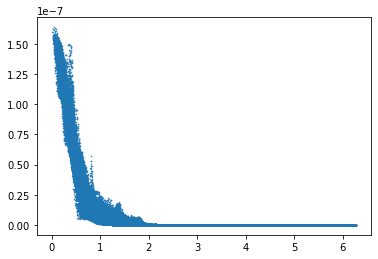

In [8]:
import matplotlib.pyplot as plt

plt.figure('co5bold densities')
plt.plot(cobolddistances[:,0]/AUcm,cobolddensities,'.',markersize=1)


In [128]:
np.max(cobolddistances[:,1])/AUcm *2

7.244193676018129

In [134]:
import numpy as np
import analyze_r3d_functions as a3d

# Load r3d-grid
griddistances = a3d.load_griddistances()
nr3d = np.size(griddistances[:,0])





In [147]:

#plt.plot(griddistances[:,0])

# Loop through grids and extract cobolddensities to my grid

# loop over nr3d
# loop over nc5d


# Declare array with r3d cell number corresponding to c5d cells
#comparisonarray = np.zeros(nc5d)

Ntest = 1000
comparisonarray = np.zeros(nr3d)


# is this faster?
# for c5dx,c5dy,c5dz in cobolddistances[:,1],cobolddistances[:,2],cobolddistances[:,3]

#xlist,ylist,zlist = [],[],[]

densityarray = np.zeros(nr3d)



#for nc in range(nc5d):

for nc in range(Ntest):

    # Compare x,y,z-coords, ie
    # Compare
    # (griddistances[:,1],griddistances[:,2],griddistances[:,3])
    # with
    # (cobolddistances[nc,1],cobolddistances[nc,2],cobolddistances[nc,3])


    # check each cell of nc5d, which cell is it closest to in r3d?
    
    # (skip sqrt to save time)

    nr = np.argmin(
        (griddistances[:,1] - cobolddistances[nc,1])**2 + \
        (griddistances[:,2] - cobolddistances[nc,2])**2 + \
        (griddistances[:,3] - cobolddistances[nc,3])**2
    )


    # Save number of c5dcells per r3dcell
    comparisonarray[nr] += 1

    # Save densities
    densityarray[nr] += cobolddensities[nc]

# Average the densities by number of c5dcells per r3dcells
densityarray = densityarray / comparisonarray


#np.unique(comparisonarray, return_counts=True)


#print(np.unique(xlist))






The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


UsageError: Line magic function `%%cython` not found.


In [1]:
import analyze_co5bold_functions as a5d
import numpy as np
import analyze_r3d_functions as a3d

# Load r3d-grid
r3dgrid = a3d.load_griddistances()

# load c5d-grid
c5dgrid,c5ddensities = a5d.load_co5boldgrid()

# translate to r3d densities
r3ddensities = a5d.load_co5bolddensity(c5dgrid,c5ddensities,r3dgrid)


KeyboardInterrupt: 

In [8]:
# translate to r3d densities
Ntest = 10000
r3ddensities = a5d.load_co5bolddensity(c5dgrid[:Ntest,:],c5ddensities[:Ntest],r3dgrid)

/home/joachim/exwings/exwings-codes/analyze_co5bold_functions.py:109: RuntimeWarning: invalid value encountered in true_divide
  


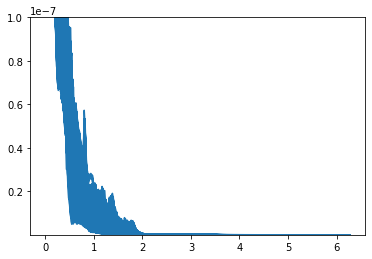

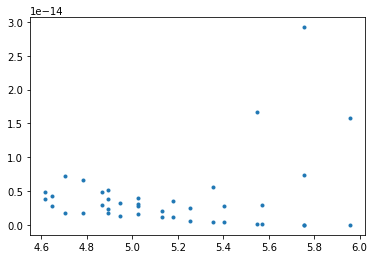

In [17]:
import matplotlib.pyplot as plt

plt.figure('c5d')
plt.plot(c5dgrid[:,0]/1.49598e13,c5ddensities)


plt.figure('c5d in r3d')
plt.plot(r3dgrid[:,0]/1.49598e13,r3ddensities,'.')

In [5]:
# Check number of hours to run all grid
#print(np.size(comparisonarray) / np.size(np.where(comparisonarray != 0)[0]) * 90 / 60)

print(f'{np.size(c5dgrid[:,0])/np.size(c5dgrid[:Ntest,0]) * (60 + 23)/3600:.2f} hours')

73.44 hours


In [1]:
import analyze_co5bold_functions as a5d

c5dgrid = a5d.load_co5boldgrid()

In [2]:
import analyze_r3d_functions as a3d
import numpy as np

# Load r3d-grid
r3dgrid = a3d.load_griddistances()
nr3d = np.size(r3dgrid[:,0])

print(np.shape(r3dgrid))


(810872, 4)


In [3]:
Ntest = 10000
r3dindeces = []
for nc in range(Ntest):

    c5dx = c5dgrid[nc,1]
    c5dy = c5dgrid[nc,1]
    c5dz = c5dgrid[nc,1]

    r3dindeces.append(a5d.compare_grids(c5dx,c5dy,c5dz,r3dgrid))


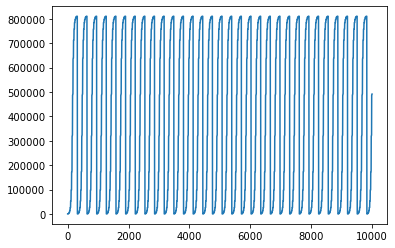

In [4]:
import matplotlib.pyplot as plt
plt.plot(r3dindeces)

In [ ]:

# My r3dgrid

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d

# See below on c5d
# length of side of grid is 7.24 AU
# the star is within 1au and 2 au approximately
# cell size is 0.023 AU
c3d.create_grid(7.24,20,[4,3,2,1])
r3dgrid = a3d.load_griddistances()

In [1]:

import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load sav-file
c5dstar = readsav('../co5bold_data/dst28gm06n056/st28gm06n056_140.sav')

# Extract data
c5dstar = c5dstar['ful']

# Get number of gridcells from co5bold data
nc5dedge = np.size(c5dstar['Z'][0][0][16])
nc5d = nc5dedge**3

# Define new grid settings

# Extract lists of cell sizes (MIGHT NOT BE REQUIRED!)
cellsizesx = []
cellsizesy = []
cellsizesz = []

for nn in range(nc5dedge):
    cellsizesx.append(
        (c5dstar['Z'][0][0][25][0][0][nn+1] - c5dstar['Z'][0][0][25][0][0][nn])
    )
    cellsizesy.append(
        (c5dstar['Z'][0][0][28][0][nn+1] - c5dstar['Z'][0][0][28][0][nn])[0]
    )
    cellsizesz.append(
        (c5dstar['Z'][0][0][31][nn+1] - c5dstar['Z'][0][0][31][nn])[0][0]
    )

# Use minimum sizes to define new grid
gridcell4 = (min(cellsizesx) + min(cellsizesy) + min(cellsizesz))/3

# Save as c5dcellsize for later
c5dcellsize = gridcell4

# Basecell is then (TODO change 4 to nrefines and make nb refinments a choice)
gridcell0 = gridcell4 * 2**4

# Grid edge size in cm (ie size of side of spatial grid cube)
# gridedge = c5dstar['Z'][0][0][16][0][0][:].max() - c5dstar['Z'][0][0][16][0][0][:].min()
gridedge = gridcell4 * len(cellsizesx)

# Define a list of distances to refinements based on maximum radial distances
# TODO reduce hard coding on this
maxradius = np.sqrt(3)*gridedge*0.5
refinementlist = [0.6*maxradius, 0.5*maxradius, 0.4*maxradius, 0.3*maxradius]
reflistau = [r/AUcm for r in refinementlist]

# Number of base cells on once side
nxyz = gridedge / gridcell0

print('Settings before creation of grid')
print(gridedge/AUcm)
print(nxyz)
print(gridcell4/AUcm)
print('')

# Create R3D grid
c3d.create_grid(gridedge/AUcm, nxyz, reflistau, savegrid=True)



Settings before creation of grid
7.267005835983904
19.8125
0.02292430863086405

Creating amr_grid with octree refinement.
Final length of total side of whole grid: 7.335778761876496 AU
Number of base cells along one side of the grid: 20
Distances to refinement limits from centrum: [3.776046998047099, 3.146705831705916, 2.5173646653647332, 1.8880234990235496] AU
Number refinements: 4
Size of base cell: 0.3667889380938248 AU
Child cell size 1: 0.1833944690469124 AU
Child cell size 2: 0.0916972345234562 AU
Child cell size 3: 0.0458486172617281 AU
Child cell size 4: 0.02292430863086405 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [3]:
import analyze_co5bold_functions as a5d
import numpy as np
AUcm = 1.49598e13 # cm

c5dgrid = a5d.load_grid_coordinates()
c5dedge = np.size(c5dgrid[:,0])

print(c5dgrid[0,:]/AUcm)
print(c5dedge)



[-3.62210188 -3.62210188 -3.62210188]
317


In [4]:
import analyze_co5bold_functions as a5d
import numpy as np
AUcm = 1.49598e13 # cm

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()

print(np.max(c5dcourners[:,0])/AUcm)
print(c5dcellsize/AUcm)


3.633553945634567
0.02292430863086405


In [2]:
import analyze_co5bold_functions as a5d
import numpy as np

c5dstar_densities = a5d.load_star_densities()

print(np.shape(c5dstar_densities))



(317, 317, 317)


In [4]:
import create_r3d_functions as c3d
import analyze_r3d_functions as a3d
import analyze_co5bold_functions as a5d
import numpy as np
from scipy.io.idl import readsav

AUcm = 1.49598e13 # cm

# Load all necessary details from c5d-data
c5dgrid = a5d.load_grid_coordinates()
nc5dedge = np.size(c5dgrid[:,0])
nc5dcube = nc5dedge**3

c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()
c5dstar_densities = a5d.load_star_densities()

# Set settings for new grid, in this specific case:
# (normally, plot and check the density distribution against R)
# (or later, just use the same size of the grid, set some good refinement
#  limits)
# 6AU side (the star seems to end at R=2AU so 3AU is good enough for this test)
# smallest grid cells are c5dcellsize > basecells are c5dcellsize*2**4
#r3dedge = 2*5*AUcm
#nxyz = 10
#refinementlist = [0.8*r3dedge,0.6*r3dedge,0.4*r3dedge,0.2*r3dedge]
#refinementlist_au = [refs/AUcm for refs in refinementlist]

# Use these for adapting cell sizes to c5d cell sizes
r3dedge = 2*3*AUcm
basecell = c5dcellsize*2**4
nxyz = r3dedge/basecell
refinementlist_au = [3,2.5,2,1.5]
refinementlist = [refs*AUcm for refs in refinementlist_au]

# Create new smaller grid
# Mind that create-grid function automatically adapts nxyz and gridedge so that
# nxyz is an even integer and cell sizes are kept as set in the initial settings
c3d.create_grid(r3dedge/AUcm, nxyz, refinementlist_au, savegrid=True)




Creating amr_grid with octree refinement.
Final length of total side of whole grid: 5.868623009501196 AU
Number of base cells along one side of the grid: 16
Distances to refinement limits from centrum: [3, 2.5, 2, 1.5] AU
Number refinements: 4
Size of base cell: 0.3667889380938248 AU
Child cell size 1: 0.1833944690469124 AU
Child cell size 2: 0.0916972345234562 AU
Child cell size 3: 0.0458486172617281 AU
Child cell size 4: 0.02292430863086405 AU
Writing amr_grid.inp
Finished amr_grid.inp
Writing grid_distances.csv and grid_cellsizes.csv
(Not necessary for Radmc3d, but useful for pre/portprocessing of your model. They have the same order as dust_densities.inp)
Finished grid_distances.csv
Finished grid_cellsizes.csv
Writing grid_info.txt
Finished grid_info.txt
Create grid: done.



In [6]:

# Extract final grid props
print('Loading R3D grid')
nxyz,nrefines,nleafs,nbranch,gridedge = a3d.load_gridprops()
r3ddistances = a3d.load_griddistances()
r3dcellsizes = a3d.load_cellsizes()

print('Loading C5D grid properties')
c5dcellsize,c5dcourners = a5d.load_grid_cellsizes()

# Start working :)
print('Translating C5D star density data to R3D density_star data')

# Declare stuff for the loops
stararray = np.zeros(nleafs)
startemperature = np.zeros(nleafs)


# Matrix with info on if c5d cells are done or not
c5dcell_list = np.zeros((nc5dedge,nc5dedge,nc5dedge))

# TODO check if I really need these counters
# Counters
c5dcounter1 = 0
c5dcounter2 = 0
progbar = 0



# Extract total range of r3dgrid
r3dcourners = [-0.5*gridedge,0.5*gridedge]

# Constant adaptive range used for when cellsizes are similar
adaptive_range = c5dcellsize/r3dcellsizes.min() * 1.2



# TODO solve the xyz-zero-plane bug
# no problem when r3dgridcell4 > c5dgridcell
# otherwise, when I get 0-cells (ie else on if nchildcells > 0)
# take the average value of surrounding c5dcells
# > now I get cells with somewhat lower density that surrounding cells


if r3dcellsizes.min() < c5dcellsize:
    print('\nERROR\n    R3D grids resolution is higher than C5D grid, stopping\n    Change your R3D grid\n')

else:
    # Otherwise loop over r3d grid
    for nr3d in range(nleafs):

        # Extract size range for current r3dcell
        r3dxrange = [
            r3ddistances[nr3d,1]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,1]+0.5*r3dcellsizes[nr3d]
        ]
        r3dyrange = [
            r3ddistances[nr3d,2]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,2]+0.5*r3dcellsizes[nr3d]
        ]
        r3dzrange = [
            r3ddistances[nr3d,3]-0.5*r3dcellsizes[nr3d],
            r3ddistances[nr3d,3]+0.5*r3dcellsizes[nr3d]
        ]   

        # Extract indeces of all c5dcells within current r3dcell
        c5dxrange = np.argwhere(r3dxrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,0] <= r3dxrange[1]),0])[:,0]
        c5dyrange = np.argwhere(r3dyrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,1] <= r3dyrange[1]),1])[:,0]
        c5dzrange = np.argwhere(r3dzrange[0] <= c5dgrid[np.argwhere(c5dgrid[:,2] <= r3dzrange[1]),2])[:,0]

        # Number of c5dcells within r3dcell
        nchildcells = c5dxrange.size*c5dyrange.size*c5dzrange.size

        if nchildcells > 0:
            # Loop through c5dcells within r3dcell
            for nnz in c5dzrange:
                for nny in c5dyrange:
                    for nnx in c5dxrange:

                        # Sum all densities
                        stararray[nr3d] += c5dstar_densities[nnx,nny,nnz]
            
            # Average the density
            stararray[nr3d] /= nchildcells

            c5dcounter1 += 1
        
        else:
            # Sometimes when r3dcellsize ~ c5dcellsize this scheme doesn't find corresponding cells
            # then I need to temporarily increase the range of the cell sizes
            temprange = [r3dxrange[0]*adaptive_range,r3dxrange[1]*adaptive_range]
            c5dxrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,0] <= temprange[1]),0])[:,0]
            temprange = [r3dyrange[0]*adaptive_range,r3dyrange[1]*adaptive_range]
            c5dyrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,1] <= temprange[1]),1])[:,0]
            temprange = [r3dzrange[0]*adaptive_range,r3dzrange[1]*adaptive_range]
            c5dzrange = np.argwhere(temprange[0] <= c5dgrid[np.argwhere(c5dgrid[:,2] <= temprange[1]),2])[:,0]

            # Number of c5dcells within r3dcell
            nchildcells = c5dxrange.size*c5dyrange.size*c5dzrange.size

            # Then loop through this new range
            for nnz in c5dzrange:
                for nny in c5dyrange:
                    for nnx in c5dxrange:

                        # Sum all densities
                        stararray[nr3d] += c5dstar_densities[nnx,nny,nnz]
            
            # Average the density
            stararray[nr3d] /= nchildcells


        # Some progress bar info
        if int(nr3d/nleafs*100) == 25 and progbar == 0:
            progbar += 1
            print('Finished 25 per cent of the grid.')

        if int(nr3d/nleafs*100) == 50 and progbar == 1:
            progbar += 1
            print('Finished 50 per cent of the grid.')

        if int(nr3d/nleafs*100) == 75 and progbar == 2:
            progbar += 1
            print('Finished 75 per cent of the grid.')

    print('Writing dust_density_star.inp')

    # Open density file
    with open('../dust_density_star.inp', 'w') as f:
        # dust and open('../dust_temperature_star.inp', 'w') as ftemp

        # Write header of dust_densities_star.inp
        # 1
        # nleafs
        # number dust species
        f.write(f'1\n{int(nleafs)}\n1\n')

        # Do I need to have an array? Can I incorporate this above?
        # Or if I want to have several data at once, perhaps this needs
        # to be an array?
        for nr3d in range(nleafs):
            f.write(f'{stararray[nr3d]}\n')





    print('C5D Dust star: done.\n')

Loading R3D grid
Loading C5D grid properties
Translating C5D star density data to R3D density_star data
Finished 25 per cent of the grid.
Finished 50 per cent of the grid.
Finished 75 per cent of the grid.
Writing dust_density_star.inp
C5D Dust star: done.



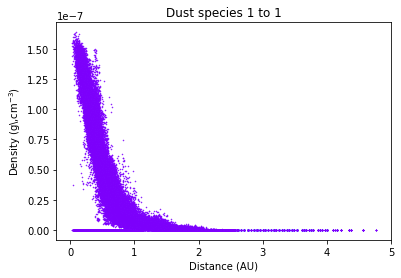

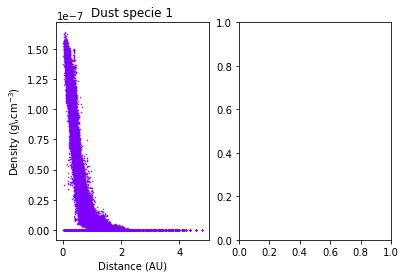

In [2]:
import analyze_r3d_functions as a3d
a3d.plot_alldensity_radius(density_path='../dust_density_star.inp')
